# Support Vector Machines


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data=load_breast_cancer()

In [9]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
features= pd.DataFrame(data['data'],columns=data['feature_names'])

In [11]:
target= pd.DataFrame(data['target'],columns=['target'])

In [12]:
df= pd.concat([features,target],axis=1)

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [19]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [20]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

/home/siavash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/siavash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


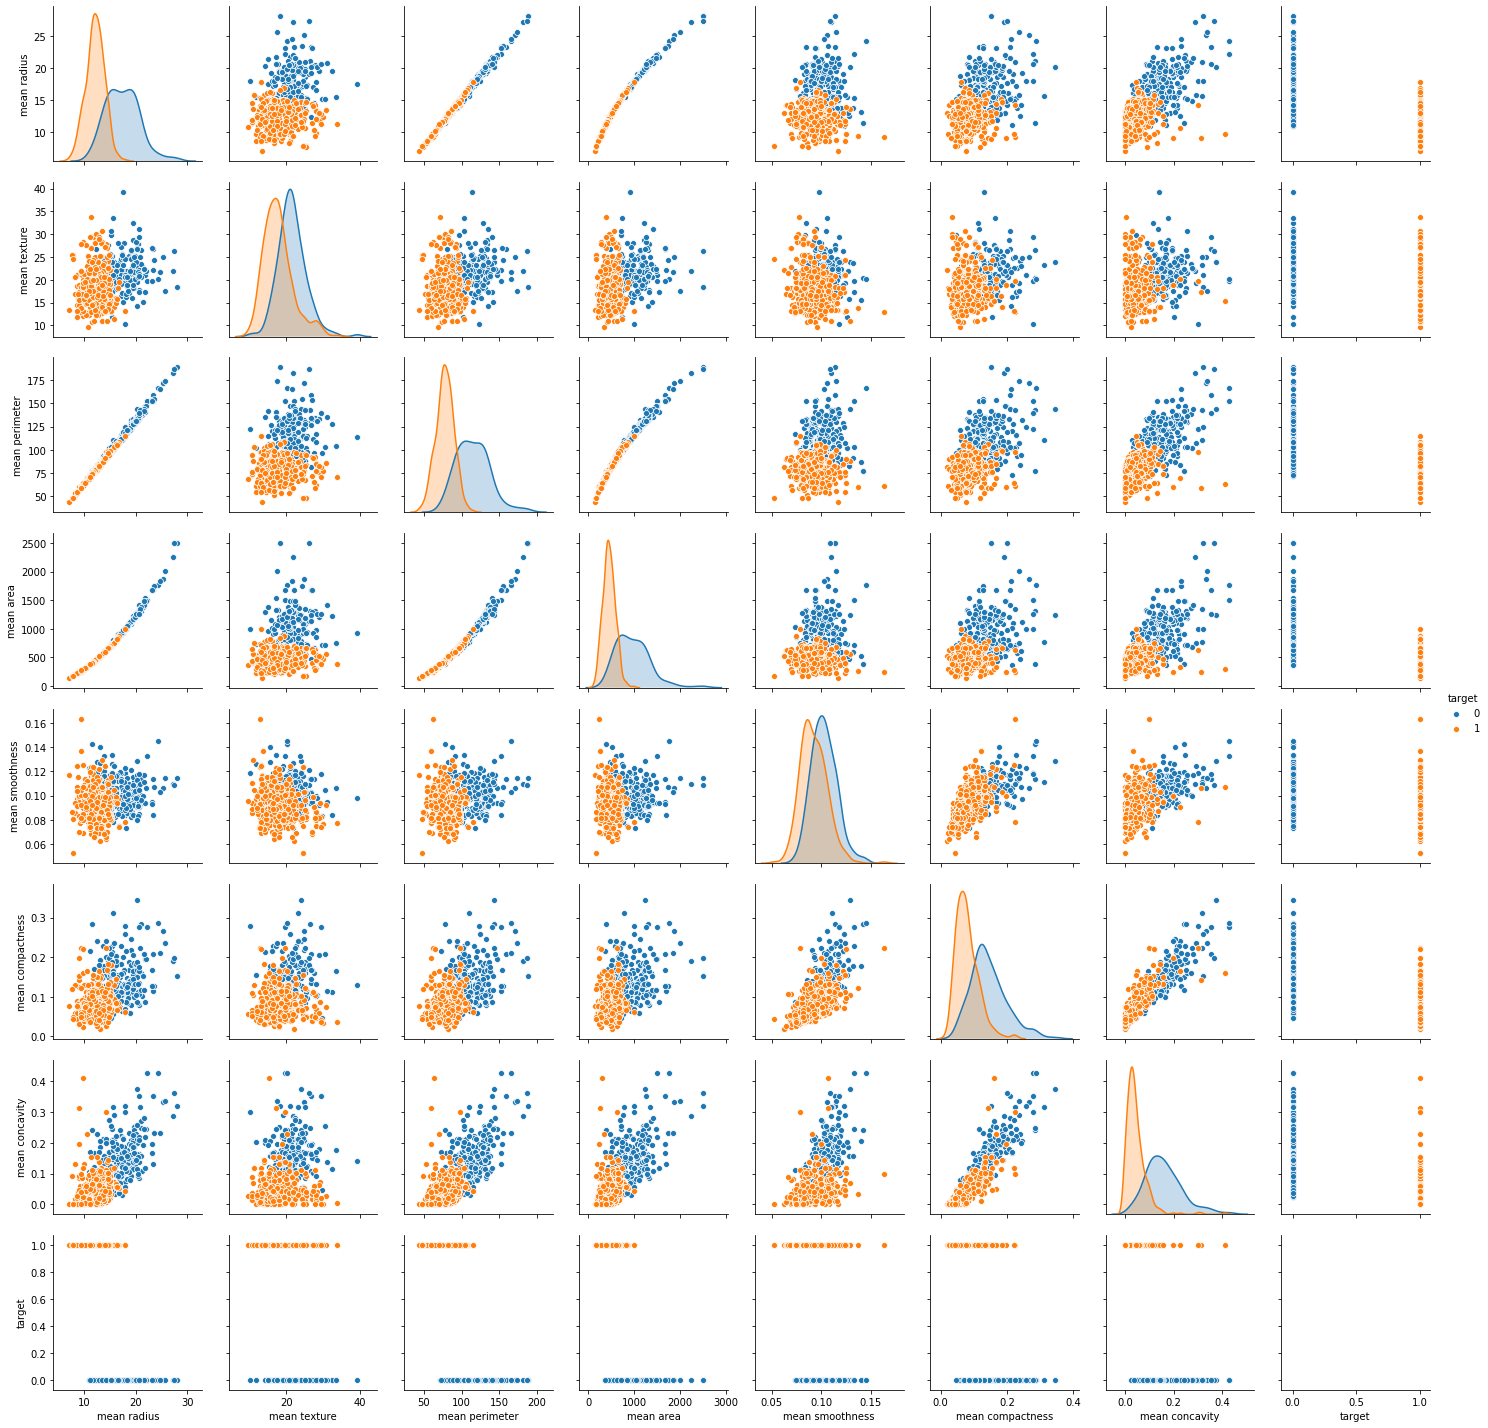

In [24]:
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity','target']],hue='target')

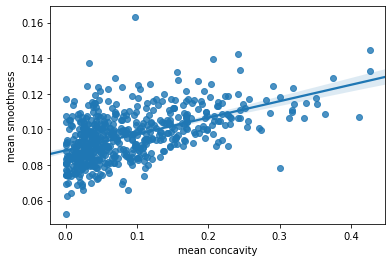

In [35]:
sns.regplot(x='mean concavity',y='mean smoothness',data=df)

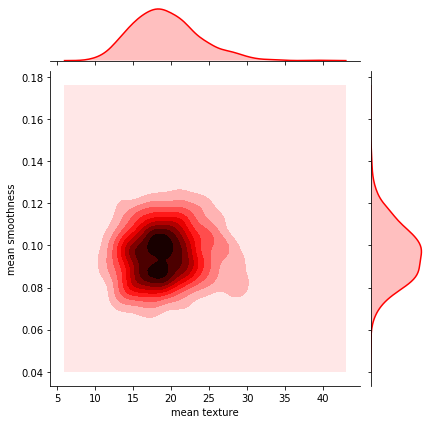

In [29]:
sns.jointplot(x='mean texture',y='mean smoothness',data=df,kind='kde',color='red')

In [36]:
from sklearn.svm import SVC

In [53]:
svm= SVC(gamma='scale')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X= df.drop('target',axis=1)
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_hat= svm.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [56]:
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.935672514619883 
 [[ 52  11]
 [  0 108]] 
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001]}
gs= GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=2)
gs.fit(X_train,y_train)
gs.best_estimator_
gs.best_params_
y_hat= gs.predict(X_test)



In [57]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={'C':[1,5,8,10,12,15,100],'gamma':[1,0.1,0.001,0.0001,0.00001]}

In [62]:
gs= GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=2)

In [63]:
gs.fit(X_train,y_train)

/home/siavash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ..........

[CV] .................................. C=12, gamma=0.1, total=   0.0s
[CV] C=12, gamma=0.1 .................................................
[CV] .................................. C=12, gamma=0.1, total=   0.0s
[CV] C=12, gamma=0.1 .................................................
[CV] .................................. C=12, gamma=0.1, total=   0.0s
[CV] C=12, gamma=0.001 ...............................................
[CV] ................................ C=12, gamma=0.001, total=   0.0s
[CV] C=12, gamma=0.001 ...............................................
[CV] ................................ C=12, gamma=0.001, total=   0.0s
[CV] C=12, gamma=0.001 ...............................................
[CV] ................................ C=12, gamma=0.001, total=   0.0s
[CV] C=12, gamma=0.0001 ..............................................
[CV] ............................... C=12, gamma=0.0001, total=   0.0s
[CV] C=12, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    1.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 8, 10, 12, 15, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [64]:
gs.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
gs.best_params_

{'C': 10, 'gamma': 0.0001}

In [68]:
y_hat= gs.predict(X_test)

In [69]:
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9649122807017544 
 [[ 59   4]
 [  2 106]] 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

